### Part -> 1  Importing all the import Library

In [1]:
# Imports core libraries for numerical operations and data handling
import pandas as pd
import numpy as np

# Imports libraries for data visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Suppresses warning messages for cleaner output.
import warnings 
warnings.filterwarnings('ignore')

# Imports preprocessing and category_encoders tools for encoding and scaling features.
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler

# Imports tools for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split

# Imports TensorFlow and Keras components for building neural network model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import joblib for saving the Scaling
import joblib


In [2]:
# Loads the 'Heart_Disease_and_Hospitals.csv' file into a DataFrame named df.
df=pd.read_csv('Heart_Disease_and_Hospitals.csv')

#### PART -> 2 DATA CLEANING

In [3]:
# Displays the number of rows and columns in the dataset.
df.shape

(10000, 15)

In [4]:
# Displays the first five rows of the dataframe
df.head()

,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,treatment_date,heart_disease
0,Alice Johnson,21,USA,Utah,138.068129,270.564349,36.101427,63.487954,Female,Alice,Johnson,Starlight Hospital,Physiotherapy,23:23.5,1
1,Bob Williams,44,USA,North Dakota,100.383639,160.910030,14.330471,187.008977,Female,Bob,Williams,Maple Leaf Hospital,Counseling,31:37.2,0
2,Oliver Jones,22,USA,Iowa,145.618318,208.490251,20.277098,35.903576,Female,Oliver,Jones,Crossroads Health Center,Medication,56:29.4,0
3,Quinn Davis,19,USA,Louisiana,152.577870,348.153738,62.712693,31.495166,Female,Quinn,Davis,Springfield General Hospital,Counseling,10:16.3,1
4,Alice Martinez,64,USA,Massachusetts,111.793570,200.628925,14.468485,154.513129,Female,Alice,Martinez,Valley View Hospital,Rehabilitation,44:00.0,1


In [5]:
# Display the random few rows of the dataset
df.sample(5)

,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,treatment_date,heart_disease
5288,Mia Davis,74,USA,Maine,153.461410,385.755307,44.487484,50.583520,Female,Mia,Davis,Sunset Valley Hospital,Counseling,41:12.7,1
1555,Eva Williams,24,USA,Alabama,91.371198,221.547015,26.589537,218.414103,Male,Eva,Williams,Southgate Medical Facility,Physiotherapy,35:02.4,1
65,Liam Garcia,28,USA,Florida,88.842410,210.967397,10.558941,109.465589,Male,Liam,Garcia,Hilltop Health Center,Physiotherapy,47:48.2,0
615,Kelly Rodriguez,33,USA,New Jersey,79.705371,96.349709,6.959255,169.035002,Female,Kelly,Rodriguez,Aspen Grove Medical Center,Rehabilitation,23:40.7,1
1444,Kelly Brown,69,USA,Alabama,141.697960,238.456908,30.226546,-49.803865,Male,Kelly,Brown,Southgate Medical Facility,Rehabilitation,10:33.2,1


In [6]:
# Displays the last 5 rows of the df DataFrame to review recent or bottom entries in the dataset
df.tail()

,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,treatment_date,heart_disease
9995,Frank Rodriguez,40,USA,Vermont,152.854412,192.077767,41.994394,13.641234,Male,Frank,Rodriguez,Hilltop Health Center,Counseling,33:42.3,1
9996,Liam Davis,65,USA,Arkansas,98.406611,345.665055,21.462140,191.357187,Female,Liam,Davis,Silver Springs Medical Center,Counseling,03:48.1,0
9997,Isaac Smith,69,USA,Mississippi,56.641116,202.976311,8.743848,21.214973,Female,Isaac,Smith,Forest View Hospital,Medication,20:39.6,0
9998,Liam Brown,62,USA,South Carolina,203.765312,286.074047,28.831543,-50.428094,Female,Liam,Brown,Valley View Hospital,Rehabilitation,42:20.5,1
9999,Nina Rodriguez,55,USA,Indiana,141.987528,327.099675,38.231999,92.448409,Male,Nina,Rodriguez,Mountainview Hospital,Physiotherapy,11:35.7,1


In [7]:
# Checks for missing values in each column of the df dataset by counting nulls
df.isnull().sum()

full_name         0
age               0
country           0
state             0
blood_pressure    0
cholesterol       0
bmi               0
glucose_level     0
gender            0
first_name        0
last_name         0
hospital          0
treatment         0
treatment_date    0
heart_disease     0
dtype: int64

In [8]:
# Displays a summary of the df DataFrame including column names, non-null counts, and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       10000 non-null  object 
 1   age             10000 non-null  int64  
 2   country         10000 non-null  object 
 3   state           10000 non-null  object 
 4   blood_pressure  10000 non-null  float64
 5   cholesterol     10000 non-null  float64
 6   bmi             10000 non-null  float64
 7   glucose_level   10000 non-null  float64
 8   gender          10000 non-null  object 
 9   first_name      10000 non-null  object 
 10  last_name       10000 non-null  object 
 11  hospital        10000 non-null  object 
 12  treatment       10000 non-null  object 
 13  treatment_date  10000 non-null  object 
 14  heart_disease   10000 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 1.1+ MB


In [9]:
# Generates descriptive statistics for all numeric columns in df, such as mean, std, min, and max values.
df.describe()

,age,blood_pressure,cholesterol,bmi,glucose_level,heart_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.566700,104.837432,206.309340,21.418244,90.239345,0.500700
std,17.962461,33.437049,95.123826,13.011348,91.885699,0.500025
min,18.000000,10.459711,0.183391,0.011695,-185.805248,0.000000
25%,33.000000,81.304705,131.375908,10.898010,13.776164,0.000000
50%,49.000000,97.742674,213.826294,21.057592,88.909937,1.000000
75%,64.000000,124.318920,279.348476,28.836712,164.695370,1.000000
max,79.000000,244.542017,539.094051,75.308643,377.564242,1.000000


In [10]:
# Checks for and counts the number of duplicate rows in the df DataFrame.
df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis

#### Part -> 3 Data Visualization

In [11]:
# Counts occurrences of each unique value in the 'gender' column.
df.value_counts('gender')

gender
Male      5082
Female    4918
Name: count, dtype: int64

<Axes: ylabel='count'>

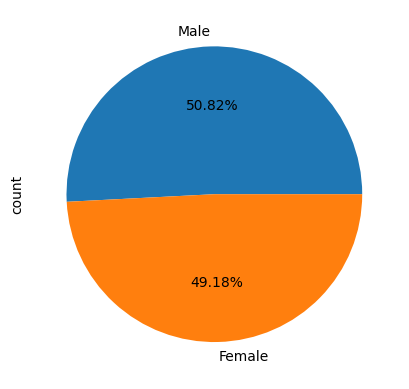

In [12]:
# Plots a pie chart showing gender distribution with percentages
df['gender'].value_counts().plot(kind="pie", autopct="%1.2f%%")

In [13]:
# Counts occurrences of each unique value in the 'treatment' column
df.value_counts('treatment')

treatment
Counseling        2084
Medication        2011
Surgery           2003
Physiotherapy     1952
Rehabilitation    1950
Name: count, dtype: int64

<Axes: ylabel='count'>

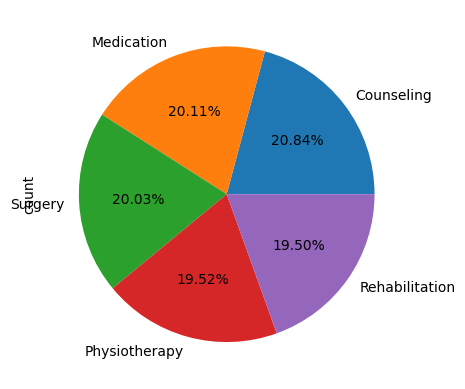

In [14]:
# Plots a pie chart showing treatment distribution with percentages
df['treatment'].value_counts().plot(kind="pie", autopct="%1.2f%%")

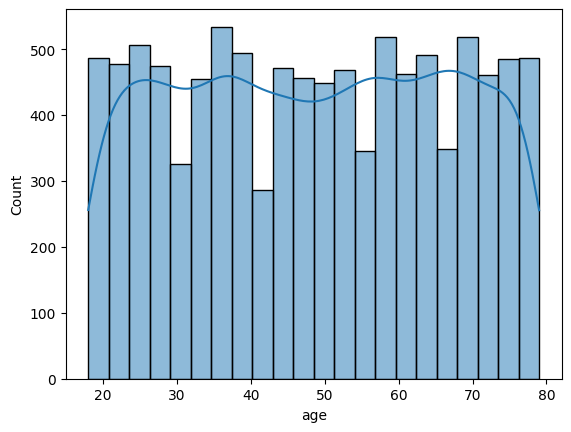

In [15]:
# Shows the distribution of age with kernel density estimate
sns.histplot(df['age'], kde=True)
plt.show()

<Axes: xlabel='heart_disease', ylabel='count'>

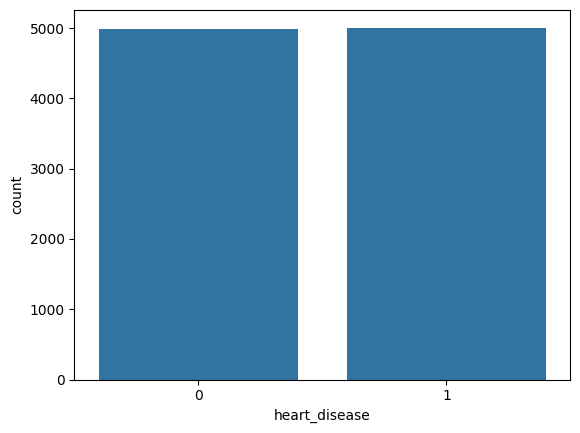

In [16]:
# Plots count plot to visualize the frequency of heart disease cases
sns.countplot(x=df['heart_disease'])

<Axes: xlabel='gender', ylabel='count'>

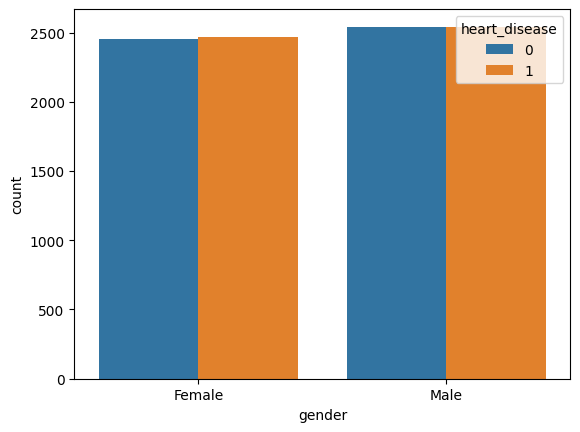

In [17]:
# Bar countplot showing heart disease distribution by gender
sns.countplot(x=df['gender'], hue=df['heart_disease'])


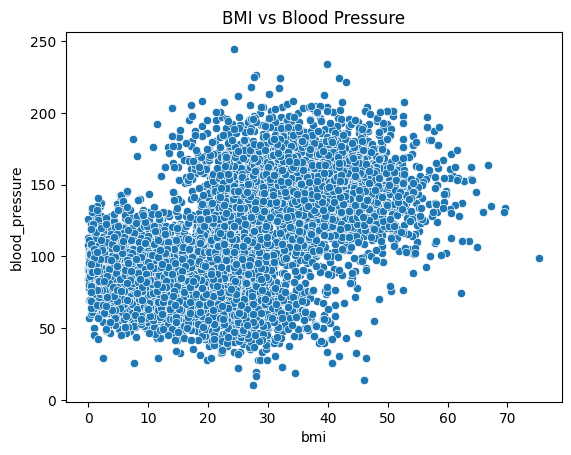

In [18]:
# Creates a scatter plot to visualize relationship between BMI and Blood Pressure
sns.scatterplot(x=df['bmi'], y=df['blood_pressure'])
plt.title("BMI vs Blood Pressure")
plt.show()

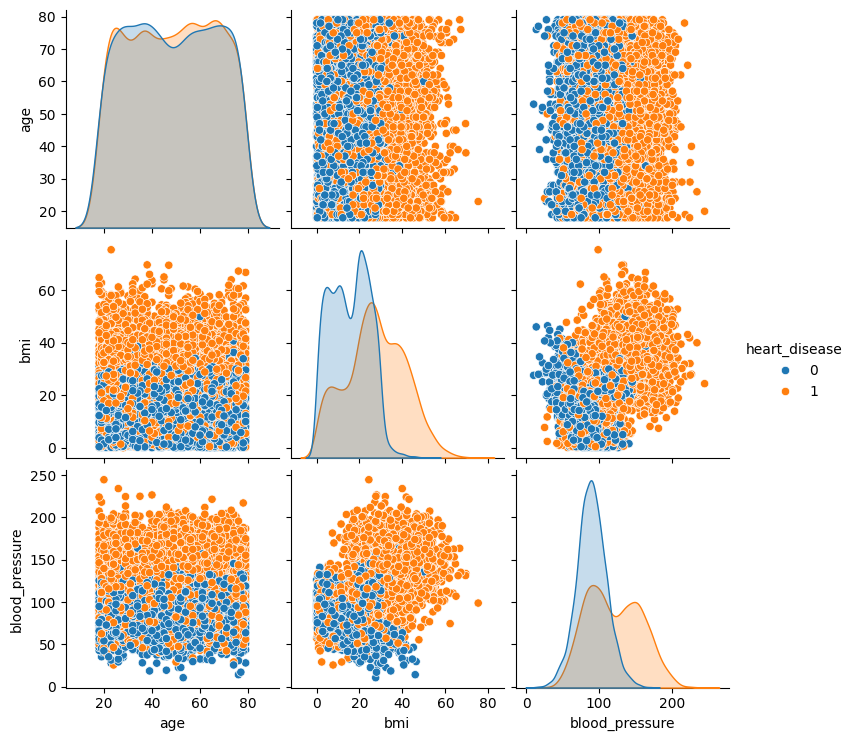

In [19]:
# Creates pairplot to visualize relationships between multiple numerical variables, colored by heart disease status
sns.pairplot(df[['age','bmi','blood_pressure','heart_disease']], hue='heart_disease')

In [20]:
# Creates a new DataFrame with selected numerical columns for outlier analysis
df1=df[['age','blood_pressure','cholesterol','bmi','glucose_level','heart_disease']]

In [21]:
df1

,age,blood_pressure,cholesterol,bmi,glucose_level,heart_disease
0,21,138.068129,270.564349,36.101427,63.487954,1
1,44,100.383639,160.910030,14.330471,187.008977,0
2,22,145.618318,208.490251,20.277098,35.903576,0
3,19,152.577870,348.153738,62.712693,31.495166,1
4,64,111.793570,200.628925,14.468485,154.513129,1
...,...,...,...,...,...,...
9995,40,152.854412,192.077767,41.994394,13.641234,1
9996,65,98.406611,345.665055,21.462140,191.357187,0
9997,69,56.641116,202.976311,8.743848,21.214973,0
9998,62,203.765312,286.074047,28.831543,-50.428094,1


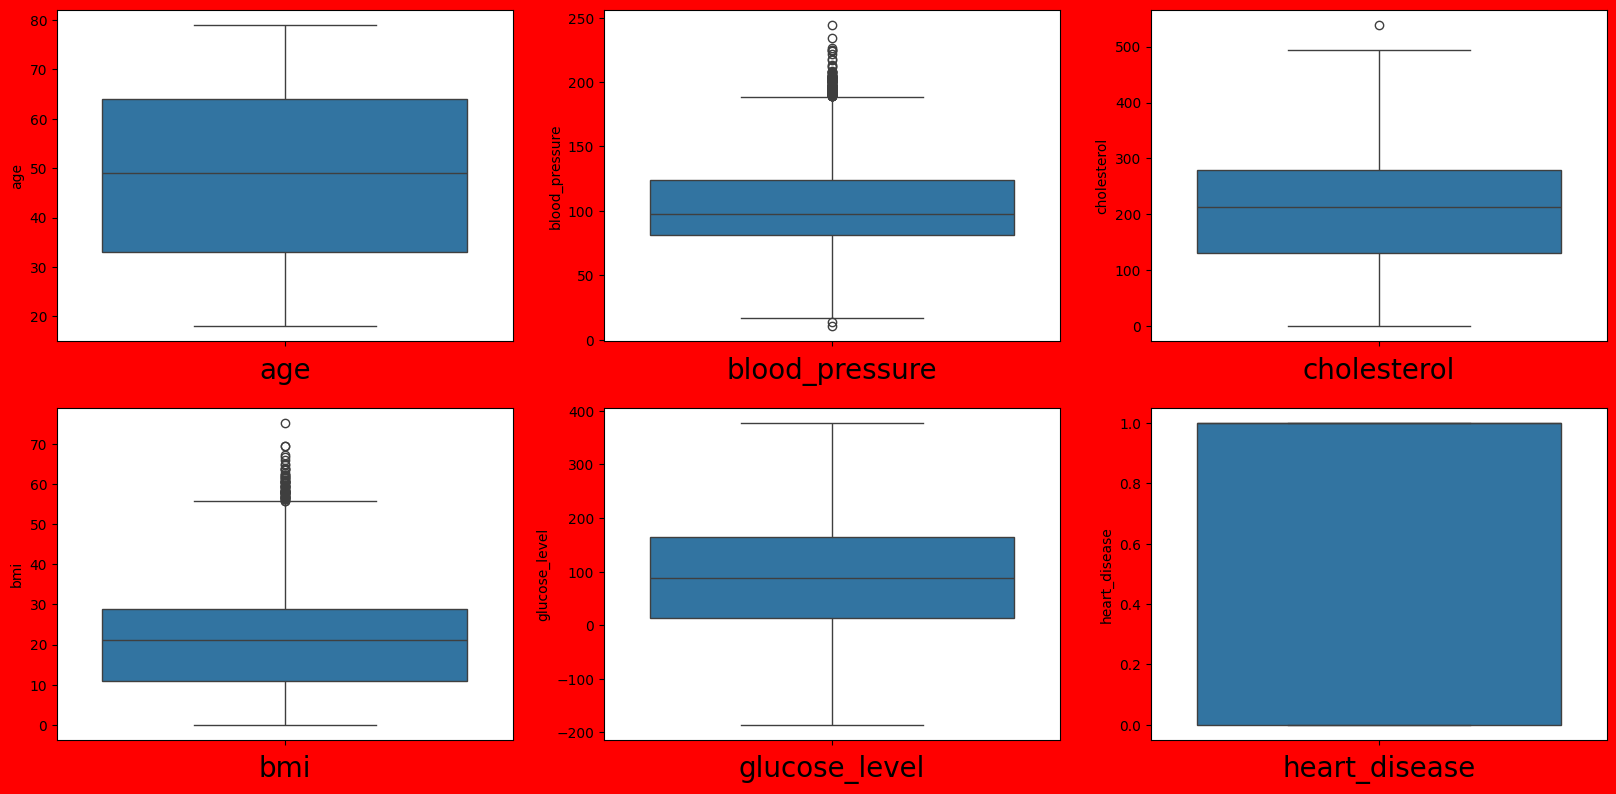

In [22]:
# Plots boxplots for all numerical columns to detect outliers and understand data spread.
plt.figure(figsize=(20,25), facecolor='red')
plotnumber =1
for column in df1:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [23]:
# Calculates the first quartile (25th percentile) for all columns in df1yuj
q1=df1.quantile(0.25)
q1

age                33.000000
blood_pressure     81.304705
cholesterol       131.375908
bmi                10.898010
glucose_level      13.776164
heart_disease       0.000000
Name: 0.25, dtype: float64

In [24]:
# Calculates the third quartile (75th percentile) for all columns in df1
q3=df1.quantile(0.75)
q3

age                64.000000
blood_pressure    124.318920
cholesterol       279.348476
bmi                28.836712
glucose_level     164.695370
heart_disease       1.000000
Name: 0.75, dtype: float64

In [25]:
# Calculates the Interquartile Range (IQR) for outlier detection
iqr=q3-q1

In [26]:
# For blood_pressure - calculates lower and upper bounds for outliers using IQR method
bp_lower = q1['blood_pressure'] - 1.5 * iqr['blood_pressure']
bp_upper = q3['blood_pressure'] + 1.5 * iqr['blood_pressure']

In [27]:
# For bmi - calculates upper bound for outliers using IQR method
bmi_upper = q3['bmi'] + 1.5 * iqr['bmi']

In [28]:
# Applies winsorization to cap blood_pressure outliers at the calculated bounds 
df1['blood_pressure'] = np.where(df1['blood_pressure'] > bp_upper, bp_upper,
                        np.where(df1['blood_pressure'] < bp_lower, bp_lower, df1['blood_pressure']))

In [29]:
#Applies winsorization to cap bmi outliers at the calculated upper bound
df1['bmi'] = np.where(df1['bmi'] > bmi_upper, bmi_upper, df1['bmi'])

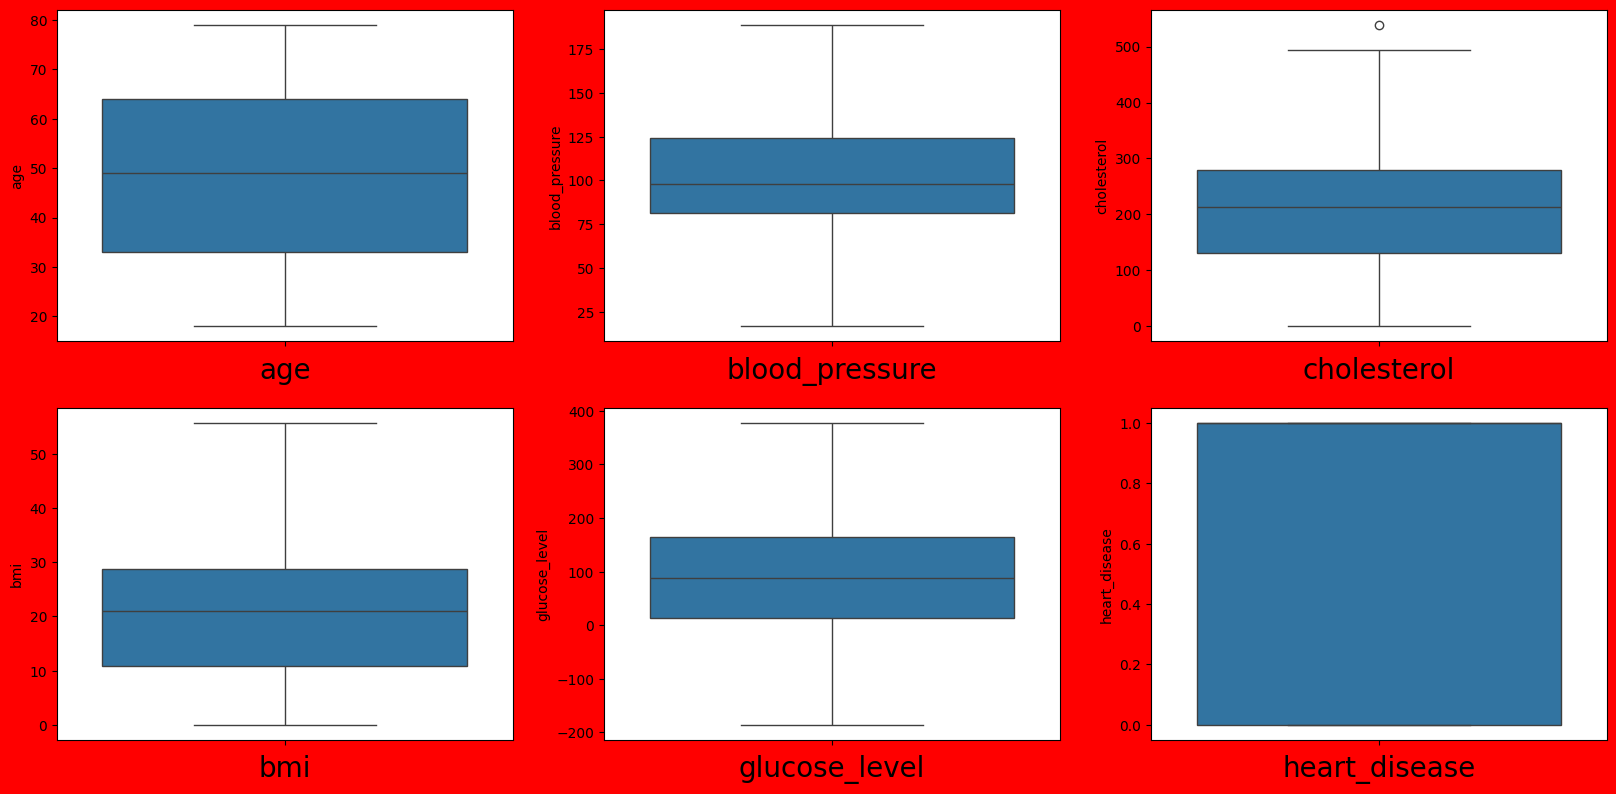

In [30]:
# Plots boxplots again after outlier treatment to verify outliers are handled
plt.figure(figsize=(20,25), facecolor='red')
plotnumber =1
for column in df1:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [31]:
# Updates the original dataframe with the cleaned blood_pressure and bmi values
df['blood_pressure'] = df1['blood_pressure']
df['bmi'] = df1['bmi']

In [32]:
# Calculates the correlation matrix for all numerical columns in the DataFrame.
corr=df[['age','blood_pressure','cholesterol','bmi','glucose_level','heart_disease']].corr()

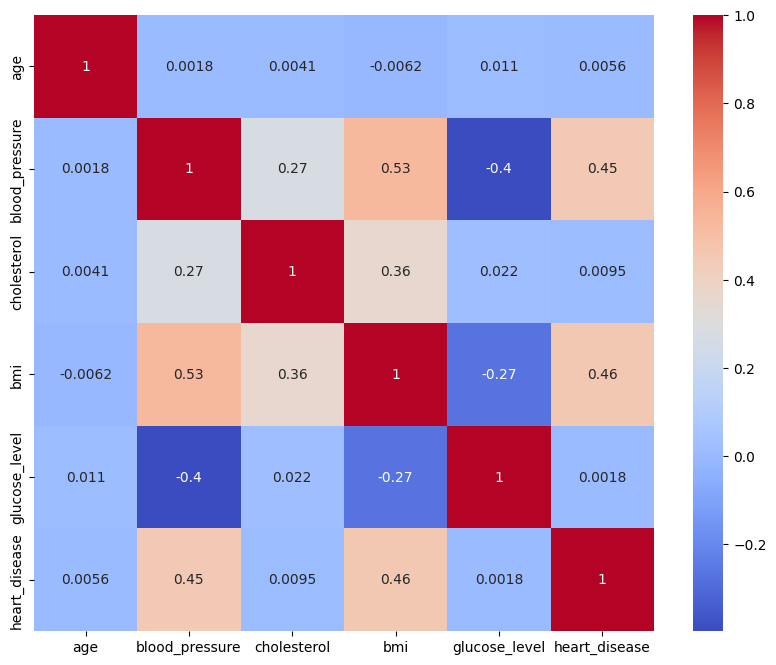

In [33]:
# Plots a heatmap to visualize the correlation between numerical features, making it easier to spot strong relationships.
plt.figure(figsize=(10,8)) 
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [34]:
# Dropping the unnecessary columns from the dataset that are not needed for modeling
df = df.drop(["full_name", "first_name", "last_name", "treatment_date",'treatment','hospital','state','country'], axis=1)


In [35]:
df

,age,blood_pressure,cholesterol,bmi,glucose_level,gender,heart_disease
0,21,138.068129,270.564349,36.101427,63.487954,Female,1
1,44,100.383639,160.910030,14.330471,187.008977,Female,0
2,22,145.618318,208.490251,20.277098,35.903576,Female,0
3,19,152.577870,348.153738,55.744766,31.495166,Female,1
4,64,111.793570,200.628925,14.468485,154.513129,Female,1
...,...,...,...,...,...,...,...
9995,40,152.854412,192.077767,41.994394,13.641234,Male,1
9996,65,98.406611,345.665055,21.462140,191.357187,Female,0
9997,69,56.641116,202.976311,8.743848,21.214973,Female,0
9998,62,188.840242,286.074047,28.831543,-50.428094,Female,1


In [36]:
# Initializes BinaryEncoder for converting categorical gender variable to binary format
bi_enc=BinaryEncoder()

In [37]:
# Applies binary encoding to the 'gender' column
df_bi = bi_enc.fit_transform(df['gender'])

In [38]:
# Drops one of the binary encoded columns to avoid multicollinearity (dummy variable trap)
df_bi=df_bi.drop(['gender_1'],axis=1)

In [39]:
df_bi

,gender_0
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,0
9997,0
9998,0


In [40]:
# Concatenates binary encoded columns with original dataframe
df_1 = pd.concat([df,df_bi],axis=1)

In [41]:
df_1

,age,blood_pressure,cholesterol,bmi,glucose_level,gender,heart_disease,gender_0
0,21,138.068129,270.564349,36.101427,63.487954,Female,1,0
1,44,100.383639,160.910030,14.330471,187.008977,Female,0,0
2,22,145.618318,208.490251,20.277098,35.903576,Female,0,0
3,19,152.577870,348.153738,55.744766,31.495166,Female,1,0
4,64,111.793570,200.628925,14.468485,154.513129,Female,1,0
...,...,...,...,...,...,...,...,...
9995,40,152.854412,192.077767,41.994394,13.641234,Male,1,1
9996,65,98.406611,345.665055,21.462140,191.357187,Female,0,0
9997,69,56.641116,202.976311,8.743848,21.214973,Female,0,0
9998,62,188.840242,286.074047,28.831543,-50.428094,Female,1,0


In [42]:
# Drops the original gender column after encoding
df_1.drop(['gender'],axis = 1,inplace = True)

In [43]:
# Renames the remaining binary encoded column for clarity
df_2 = df_1.rename(columns={'gender_0': 'gender'})

In [44]:
df_2

,age,blood_pressure,cholesterol,bmi,glucose_level,heart_disease,gender
0,21,138.068129,270.564349,36.101427,63.487954,1,0
1,44,100.383639,160.910030,14.330471,187.008977,0,0
2,22,145.618318,208.490251,20.277098,35.903576,0,0
3,19,152.577870,348.153738,55.744766,31.495166,1,0
4,64,111.793570,200.628925,14.468485,154.513129,1,0
...,...,...,...,...,...,...,...
9995,40,152.854412,192.077767,41.994394,13.641234,1,1
9996,65,98.406611,345.665055,21.462140,191.357187,0,0
9997,69,56.641116,202.976311,8.743848,21.214973,0,0
9998,62,188.840242,286.074047,28.831543,-50.428094,1,0


In [45]:
# Assigns the target variable 'heart_disease' to the variable y for model training.
y = df_2['heart_disease']

In [46]:
df_2.head()

,age,blood_pressure,cholesterol,bmi,glucose_level,heart_disease,gender
0,21,138.068129,270.564349,36.101427,63.487954,1,0
1,44,100.383639,160.910030,14.330471,187.008977,0,0
2,22,145.618318,208.490251,20.277098,35.903576,0,0
3,19,152.577870,348.153738,55.744766,31.495166,1,0
4,64,111.793570,200.628925,14.468485,154.513129,1,0


In [47]:
# Creates the feature set 'x' by dropping the target column 'heart_disease'
x = df_2.drop('heart_disease', axis=1)


#### Part -> 5 

In [48]:
x

,age,blood_pressure,cholesterol,bmi,glucose_level,gender
0,21,138.068129,270.564349,36.101427,63.487954,0
1,44,100.383639,160.910030,14.330471,187.008977,0
2,22,145.618318,208.490251,20.277098,35.903576,0
3,19,152.577870,348.153738,55.744766,31.495166,0
4,64,111.793570,200.628925,14.468485,154.513129,0
...,...,...,...,...,...,...
9995,40,152.854412,192.077767,41.994394,13.641234,1
9996,65,98.406611,345.665055,21.462140,191.357187,0
9997,69,56.641116,202.976311,8.743848,21.214973,0
9998,62,188.840242,286.074047,28.831543,-50.428094,0


In [49]:
#Here we use StandardScaler function to standardize data values into a standard format

In [50]:
# Initializes the StandardScaler to standardize features by removing the mean and scaling to unit variance.
scaler=StandardScaler()

In [51]:
# Fits the scaler to the feature set 'x' and transforms it to produce the standardized feature set 'x_scaled'.
x_scaled=scaler.fit_transform(x)


In [52]:
# Displays the standardized feature set after applying StandardScaler.
x_scaled

array([[-1.53476063,  1.00914159,  0.67552184,  1.13877061, -0.29115226,
        -1.01653671],
       [-0.25424847, -0.13073801, -0.47728926, -0.5461886 ,  1.05320492,
        -1.01653671],
       [-1.47908619,  1.23751956,  0.02292821, -0.08595051, -0.59137044,
        -1.01653671],
       ...,
       [ 1.13761257, -1.4538609 , -0.03504059, -0.9785643 , -0.75123577,
        -1.01653671],
       [ 0.74789148,  2.54489536,  0.83857745,  0.57611923, -1.53097244,
        -1.01653671],
       [ 0.35817039,  1.12769549,  1.26988558,  1.30366588,  0.02404263,
         0.9837323 ]], shape=(10000, 6))

In [53]:
# Save scaler
joblib.dump(scaler, 'scaler.pkl')
print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


### Part -> 6 Train Test Split

In [54]:
# Splits the dataset into training and testing sets with 70% for training and 30% for testing using a fixed random state.
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=22)

### Part -> 7

In [55]:
# Builds a sequential neural network model with three layers
model = Sequential([
    Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')   
])

In [56]:
# Compiles the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
# Imports EarlyStopping callback to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
# Sets up early stopping to monitor validation loss and restore best weights
ear_sto = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [59]:
# Trains the neural network model with early stopping and validation split
model.fit(x_train, y_train,
          epochs=50,
          batch_size=8,
          validation_split=0.2,
          callbacks=[ear_sto],
          verbose='auto')

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8502 - loss: 0.3417 - val_accuracy: 0.9071 - val_loss: 0.2169
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9264 - loss: 0.2032 - val_accuracy: 0.9186 - val_loss: 0.1934
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9273 - loss: 0.1926 - val_accuracy: 0.9193 - val_loss: 0.1894
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9321 - loss: 0.1866 - val_accuracy: 0.9086 - val_loss: 0.1976
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9316 - loss: 0.1830 - val_accuracy: 0.9221 - val_loss: 0.1826
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9330 - loss: 0.1794 - val_accuracy: 0.9250 - val_loss: 0.1836
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9302 - loss: 0.1785 - val_accuracy: 0.9236 - val_loss: 0.1759
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9316 - loss: 0.1757 - val_accuracy: 0.

In [60]:
# Evaluates the trained model on the test set to get final accuracy and loss
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9257 - loss: 0.1818 
Test Accuracy: 0.9256666898727417
Test Loss: 0.1818103790283203


In [61]:
# Makes predictions on the test set and converts probabilities to binary classes (0 or 1)
y_pred = model.predict(x_test)
y_pred_classes = (y_pred>0.5).astype(int)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [62]:
# Saves the trained model to a file
model.save("heart_disease_model.h5")

### THE END